### Ejercicio 1: Relaciones de recurrencia

Así como se hizo en clase para la exponencial, el logaritmo, y las potencias; obtén las series de recurrencia para las siguientes funciones:

* Seno.
* Coseno.
* Tangente.
* Cotangente.

¿Hay algún problema al intentar calcular la cotangente? Si la respuesta es sí ¿cuál?, si la respuesta es no ¿por qué?

La ecuación diferencial del seno es $$\frac{d^2x}{dt^2} + x(t) = 0,$$ con las condiciones iniciales $x(0) = 0$ y $\frac{dx}{dt}(0) = 1$. Escribiendo la función $x(t)$ como serie de potencias alrededor del cero, tenemos $$ x(t) = \sum_{k=0}^{\infty} x_k t^k,$$ y la segunda derivada es $$ \frac{d^2x}{dt^2} = \sum_{k=2}^{\infty} (k-1)kx_kt^{k-2} $$. Sustituyendo en la ecuación diferencial, $$ \sum_{k=2}^{\infty} (k-1)kx_kt^{k-2} + \sum_{k=2}^{\infty} x_{k-2} t^{k-2} = 0. $$ Donde se ha cambiado los índices la serie de $x(t)$ para poder agrupar las sumas. Concluyendo que $$ (k-1)kx_k + x_{k-2},  $$ O bien, $$ x_k = \frac{-x_{k-2}}{k(k-1)} $$. Las condiciones iniciales del seno implican que los términos pares se van y sólo quedan los impares, de la forma $$ x_{2k+1} = \frac{(-1)^k}{(2k+1)!}.$$ Entonces, podemos escribir la serie de recurrencia del seno como $$ x(t)=\sin(t) = \sum_{k=0}^{\infty} \frac{(-1)^k t^{2k+1}}{(2k+1)!} .$$

Para el coseno tenemos la misma ecuación diferencial, pero con las condiciones iniciales $x(0) = 1$ y $\frac{dx}{dt} (0)= 0$. Así, la serie de recurrencia es la misma, sólo que las condiciones iniciales imponen que los términos con $k$ impar desaparezcan, dejando sólo términos pares. Por consiguiente, la serie de recurrencia del coseno es

$$ x(t) = \cos(t) =  \sum_{k=0}^{\infty} \frac{(-1)^k t^{2k}}{(2k)!}. $$

Ahora, para encontrar la serie de la tangente usamos el hecho de que $\tan(t) = \frac{\sin(t)}{\cos(t)}$ y la fórmula $$(f/g)_k = \frac{1}{g_0} \left( f_k - \sum_{i=0}^{k-1} (f/g)_i g_{k-i} \right) ,$$ 
con $f(t) = \sin(t)$ y $g(t) = \cos(t)$. Además hay que notar que la tangente es impar, al igual que el seno. Entonces, el elemento $2k+1$ de la tangente se puede escribir como
$$\tan_{2k+1} = \sin_{2k+1} - \sum_{i=0}^{2k}\tan_i \cos_{2k-i}$$
$$ = \frac{(-1)^k}{(2k+1)!} - \sum_{i=0}^{2k} \frac{(-1)^k}{(2k)!} \tan_i,$$

o bien

$$\tan(t) = \sum_{k=0}^{\infty} (-1)^k \left( \frac{1}{(2k+1)!} - \sum_{i=0}^{2k} \frac{1}{(2k)!} \tan_i\right) t^{2k+1}.$$

Por otro lado, sabemos que $\cot(t) = \frac{\cos(t)}{\sin(t)}$ está indefinido en el cero, de hecho, está bien definido en $(0,\pi)$ así que no se puede hacer la serie de la cotangente alrededor de este punto, como habíamos hecho hasta ahora. Para resolver esto se puede escribir la serie alrededor de otro punto, como $\frac{\pi}{2}$ por ejemplo. Así, escribimos las series del coseno y seno alrededor de $\frac{\pi}{2}$, 

$$\cos(t)= - \sum_{k=0}^{\infty} \frac{(-1)^k}{(2k+1)!} (t-\pi /2)^{2k+1}$$
$$\sin(t) = \sum_{k=0}^{\infty} \frac{(-1)^k}{(2k)!} (t-\pi /2)^{2k}$$

ahora se puede sustituir en la fórmula de la división, con $f(t) = \cos(t)$ y $g(t) = \sin(t)$.  Análogamente a como se hizo con la tangente se  encuentra que alrededor de $\pi /2$ la cotangente se puede escribir como

$$\cot(t) = \sum_{k=0}^{\infty} (-1)^k \left( \frac{-1}{(2k+1)!} - \sum_{i=0}^{2k} \frac{1}{(2k)!} \cot_i\right) (t-\pi /2)^{2k+1}.$$

Como se vió, alrededor del cero hay problemas con la cotangente pues el seno se anula en el cero, pero se resolvió evaluando la serie de Taylor alrededor de $t = \pi/2.$

### Ejercicio 2: Integración con Runge–Kutta

Utilizando el método de [Runge–Kutta de cuarto orden](http://www.ctcms.nist.gov/~langer/oof2man/RegisteredClass-RK4.html) haz lo siguiente:

* Integra la siguiente ecuación diferencial,

$$ \dot{x} = x^2, \qquad x(0) = 1.$$ 

* Compara tu solución contra la solución analítica en una gráfica.
* Muestra cómo se comporta el error.

Primero se definirá la función rk4 que implemente el método de Runge-Kutta. Tomará los parámetros condición inicial, "campo vectorial", tamaño de la partición y los extremos del intervalo de integración.

In [18]:
function rk4(x0,f,m,a,b)
    x = Float64[]
    t = Float64[]
    
    
    push!(x,x0)
    push!(t,a)
  
    Δt = (b-a)/m
    for n in 1:m+1
        k1 = Δt*f(x[n]) 
        k2 = Δt*f(x[n]+k1/2)
        k3 = Δt*f(x[n]+k2/2)
        k4 = Δt*f(x[n]+k3)
        
        push!(t,t[n] + Δt)
        
        push!(x,x[n] + k1/6 + k2/3 + k3/3 + k4/6)
        
    end
    
   
    return [t hcat(x...)'] #Se crea una matriz para poder graficar
    
end


rk4 (generic function with 1 method)

Veamos primero qué hace en un intervalo que no pase por la singularidad, que como bien sabemos está en $t=1$. Probemos con el intervalo $(0,0.8)$

In [36]:
f(x) = x^2
yrk = rk4(1,f,10000,0.99,0.999)




10002x2 Array{Float64,2}:
 0.99      1.0    
 0.990001  1.0    
 0.990002  1.0    
 0.990003  1.0    
 0.990004  1.0    
 0.990004  1.0    
 0.990005  1.00001
 0.990006  1.00001
 0.990007  1.00001
 0.990008  1.00001
 0.990009  1.00001
 0.99001   1.00001
 0.990011  1.00001
 ⋮                
 0.998991  1.00907
 0.998992  1.00907
 0.998993  1.00907
 0.998994  1.00908
 0.998995  1.00908
 0.998995  1.00908
 0.998996  1.00908
 0.998997  1.00908
 0.998998  1.00908
 0.998999  1.00908
 0.999     1.00908
 0.999001  1.00908

In [20]:
using PyPlot

0.9944823639920491

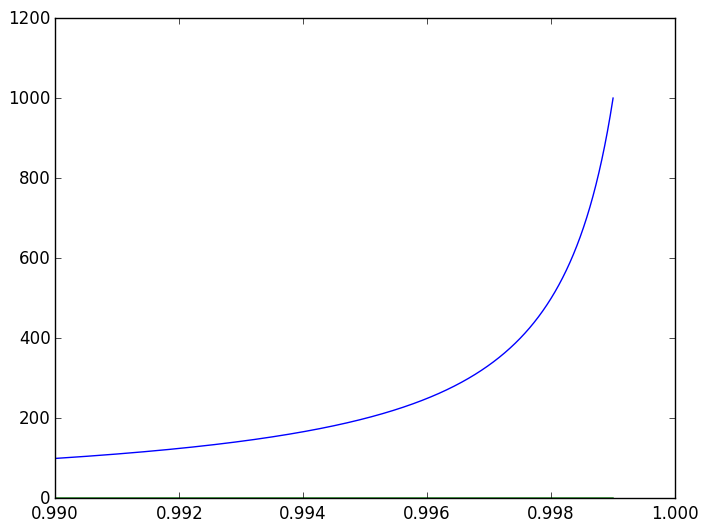

In [39]:
#An es la solución analítica, se crea un arreglo, para tener cada valor de la partición.
An = Float64[]
for n in yrk[:,1]
    push!(An, 1/(1-n))
end

promedio = 0

for n in 1:length(yrk[:,1])
    promedio = promedio + abs(((yrk[n,2]-An[n])/An[n]))
end
promedio = promedio / length(yrk[:,1])

#Se grafican tanto la solución analítica como lo que arroja rk4.
plot(yrk[:,1], An[:])
plot(yrk[:,1], yrk[:,2])

println(promedio)

Se tiene un error relativo de 0.9944823639920491. Bastante alto.

In [40]:
yrk = rk4(1,f,1000,0,1.1)

1002x2 Array{Float64,2}:
 0.0       1.0    
 0.0011    1.0011 
 0.0022    1.0022 
 0.0033    1.00331
 0.0044    1.00442
 0.0055    1.00553
 0.0066    1.00664
 0.0077    1.00776
 0.0088    1.00888
 0.0099    1.01   
 0.011     1.01112
 0.0121    1.01225
 0.0132    1.01338
 ⋮                
 1.089   Inf      
 1.0901  Inf      
 1.0912  Inf      
 1.0923  Inf      
 1.0934  Inf      
 1.0945  Inf      
 1.0956  Inf      
 1.0967  Inf      
 1.0978  Inf      
 1.0989  Inf      
 1.1     Inf      
 1.1011  Inf      

No es necesario graficar para darse cuenta que después de la indeterminación en $t=1$ todo se indetermina. Esto debido a que el método rk4 es recursivo.

###  Ejercicio 3: Integración con Taylor 

Repite los tres puntos del ejercicio anterior utilizando el método de integración de Taylor.

Sabemos que para una ecuación diferencial ordinaria de primer grado $$\dot{x}= f(x) , x(0) = x_0$$

Los coeficientes de la serie de potencias para $x$ están dados por la sucesión de recurrencia $$ x_{k+1} = \frac{f_k}{k+1}, $$ donde $x_0$ es la semilla de la recurrencia.

Así que primero construyamos los coeficientes al rededor del cero.


In [23]:
Order_N = 20 #Truncamiento de la serie.

X = Float64[]
push!(X,1)
for n in 2:Order_N
    b=0
    for i in 1:n-1
        b= b +  X[i]*X[n-i]
    end
    push!(X,b/(n-1))
    
end

X
        

20-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

Ahora evaluamos en el siguiente paso $\Delta t$. O sea, con nuestro truncamiento tenemos,$$x(\Delta t) = \sum_{k= 0}^{20} (\Delta t)^k$$. 

Tenemos que $\Delta t$ en nuestro caso debe cumplir con 
 
$$ \Delta t < \left(\epsilon /x_{20} \right)^{1/20},$$

para fijar ideas, hagamos $\Delta t = \frac{1}{2} \left(\epsilon /x_{20} \right)^{1/20} $. con $\epsilon = 1.0\times 10^{-20}$

In [24]:

ϵ0 = 1.0e-80 # Se define la épsilon.
Δt = 0.5*(ϵ0)^(1/20) # Se define el siguiente paso.

a = 0

for k in 2:Order_N # se va de regreso para aumentar la presición y no sumar épsilons de la máquina.
    
    a = (X[22-k] + a)*Δt
    
end

a +X[1]
 


1.000050002500125

Este último resultado es $x(\Delta t)$. Ahora se repetirán estos últimos pasos, se encontrará un nuevo paso $\Delta t'$ y se encontrará la serie al rededor de $\Delta t$. Se encontrará el valor de $x(\Delta t + \Delta t')$ con esta serie y así se va avanzando... En el siguiente código se implementará un código que haga esto para el intervalo dado. Empezando desde cero, se vuelve a hacer lo que se hizo arriba. Eso sólo se hizo para entender que estaba pasando.

In [25]:
#Se define la función IntTaylor que ejecuta el método de Taylor para el caso particular de esta tarea.
function IntTaylor(ϵ0, c)

#ϵ0 = 1.0e-20 # Se define la épsilon.

t=0

Xsol = Float64[] #Xsol irá guardando los valores de x(t)
tiempo = Float64[]#tiempo tendrá los elementos de la partición en el intervalo En el que se esté trabajando.

push!(Xsol,1) #La condición inicial.

push!(tiempo,t) #El primer elemento de la partición es cero.

m = 1 # Necesito contar los ciclos del while siguiente.

    while t <=c
    
        X = Float64[] #Este arreglo tendrá los coeficientes de la serie al rededor de 't'.
        push!(X,Xsol[m]) #El primer coeficiente es la condición 'inicial'
    
            for n in 2:Order_N # En este ciclo se calculan los coeficientes de la serie al rededor de 't'
        
                b=0
                for i in 1:n-1
                    b= b +  X[i]*X[n-i]
                end
                push!(X,b/(n-1))
  
            end
        
            Δt = 0.5*(ϵ0/X[20])^(1/19) # Se define el tamaño del siguiente paso.
            a = 0

            for k in 2:Order_N # se va de regreso para aumentar la presición y no sumar épsilons de la máquina.
                a = (X[22-k] + a)*Δt
            end

            push!(Xsol,a +X[1]) #Al arreglo Xsol se le agrega la siguiete solución. 
            t = t +Δt; #Se avansa en el tiempo
            push!(tiempo,t)
            m = m +1;#Simplemente un contador
    
            if m == 10000
                break
            end
    
    end
    
    return Xsol, tiempo
end

IntTaylor (generic function with 1 method)

In [34]:
y = IntTaylor(1.0e-20,0.999)[1]
tiempo= IntTaylor(1.0e-20,0.999)[2]

186-element Array{Float64,1}:
 0.0      
 0.0442933
 0.086524 
 0.126793 
 0.165195 
 0.201821 
 0.236758 
 0.270088 
 0.301887 
 0.332229 
 0.361185 
 0.388821 
 0.415199 
 ⋮        
 0.998611 
 0.998654 
 0.998696 
 0.998737 
 0.998776 
 0.998814 
 0.998851 
 0.998887 
 0.998921 
 0.998955 
 0.998987 
 0.999018 

In [35]:
An = Float64[]
for n in tiempo[:]
    if n>=0.99
        push!(An, 1/(1-n))
    end
end

promedio = 0

ξ=length(y) - length(An)

for n in 1:length(An)
    
    promedio = promedio + abs(((y[ξ+n]-An[n])/An[n]))

end
promedio = promedio / length(tiempo)

#plot(tiempo[:], y[:])
#plot(tiempo[:], An[:])

println(promedio)

1.2209854162034576e-13


Con el método de Taylor se encuentra un error relativo promedio de `1.2209854162e-13`. Doce órdenes de magnitud más pequeña que el error de RK4.

La diferencia más importante entre estos dos métodos se estudia a continuación. Integremos en un intervalo que supere la singularidad. Recordemos que Runge-Kuta, debido a su paso fijo, pasa por la singularidad y se indetermina todo después de esta. Veamos qué hace Taylor.

In [28]:
y = IntTaylor(1.0e-20,1.2)

([1.0,1.04635,1.09472,1.1452,1.19788,1.25285,1.3102,1.37003,1.43243,1.49752  …  1.51856e15,1.51856e15,1.51856e15,1.51856e15,1.51856e15,1.51856e15,1.51856e15,1.51856e15,1.51856e15,1.51856e15],[0.0,0.0442933,0.086524,0.126793,0.165195,0.201821,0.236758,0.270088,0.301887,0.332229  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])

2209854162034576e-13


Lo primero que salta a la vista es el hecho de que el arreglo que salió tiene 10000 (diezmil) entradas, que resulta ser el límite impuesto en el número de itarciones. A continuación se observa dicho arreglo y se tiene que la solución no se indetermina. Se estanca en un valor más no regresa infinito como respuesta. Esto es, el método de Taylor no pasa por la singularidad. Esto porque, a diferencia de RK4, Taylor no tiene un paso fijo en el dominio. Va construyendo la solución localmente y el siguiente paso depende del anterior. Esta es una ventaja enorme. Por que a priori no se sabe si la solución se indetermina o no en algún punto, restringiendo el dominio. Y Taylor integra sobre el dominio deseado sin que lo especifiquemos en algún lado. Sólo hay que tener cuidado en fijar un número máximo de iteraciones.

### Ejercicio 4: Recordatorio

> Memoria minuitur nisi eam exerceas — La memoria disminuye si no la ejercitas (Marco Tulio Cicerón).

Con tus palabras explica (sin utilizar muchas matemáticas) lo siguiente:

* La esencia del método de integración de Taylor.
* ¿Qué relación tiene con los duales?
* ¿Cómo elegimos el paso de avance en el método de Taylor?
* ¿Se pueden integrar sistemas de ecuaciones con este método? ¿Por qué?

* La escencia del método de integración de Taylor es construir la solución a una ecuación diferencial usando polinomios de Taylor localmente, comenzando con la condición inicial. Después, el siguiente paso lo determina el mismo método, no es algo que esté dado, como en el caso de RK4.

* Lo más importante del método de Taylor es poder manipular los coeficientes de los polinomios. Esto se puede hacer muy fácil si se definen vectores de $n$ entradas $(a_0, a_1, a_2, ..., a_n)$ donde cada $a_i$ es el coeficiente de un polinomio de Taylor de orden $n$ de alguna función $x(t)$. Análogamente como con los Dueales, para estos vectores se definen operaciones aritméticas básicas, y funciones más complicadas (polinomios, exponentes, trigonométricas, exponenciales, logaritmos, ...) con lo que se simplifica el método de integración de Taylor, además de economizar recursos.

* En el método de integración de Taylor, la partición en el dominio no es algo que esté dado desde un principio. Esta se va construyendo junto con la solución, depende de la precisión deseada así como del polinomio recién calculado (los últimos términos para precisar más).

* Se sabe las la series de Taylor se puden generalizar para funciones definidas de $\mathbb{R}^n$ a $\mathbb{R}$, así que el método de integración de Taylor también se puede generalizar a más dimensiones. 

